Бабеноко Роман НММбд-01-22

Отчёт по лаборатоной работе номер 2

Задание 1.

Написать фукцию наподобие gradient_descent_reg_l2, но с применением L1 регуляризации

Импортируем numpy, скопируем код gradient_descent_reg_l2, только градиент регуляризации будем находить не по формуле 

$$d\lambda ||w||^{2} = 2\lambda w $$

, а по формуле 

$$d\lambda |w| = \lambda * sign(W)$$

In [13]:
import numpy as np

# для вычисления ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-30):
    # выбираем случайные стартовые веса
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    # запускаем цикл длинной в количество итераций
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки
        dReg = reg * np.sign(W)  # градиент регуляризации L1

        W -= eta * (dQ - dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Протестируем на данных: 

In [14]:
X = np.array([[1, 1, 500, 1],
              [1, 1, 700, 1],
              [1, 2, 750, 2],
              [1, 5, 600, 1],
              [1, 3, 1450, 2],
              [1, 0, 800, 1],
              [1, 5, 1500, 3],
              [1, 10, 2000, 3],
              [1, 1, 450, 1],
              [1, 2, 1000, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])


gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [1.76004122 0.37339623 0.97847287 0.53383642], error 3254.017373145631
Iter: 500, weights: [56.49775435  5.89010616  1.24625818  5.32585392], error 25.346610814182842
Iter: 1000, weights: [56.49999991  6.1811989   0.21206563  6.10622754], error 24.961453636355422
Iter: 1500, weights: [56.5         6.26058764 -0.15220851  6.4031494 ], error 24.91198114966
Iter: 2000, weights: [56.5         6.28786392 -0.28291786  6.51084429], error 24.90557271477142
Iter: 2500, weights: [56.5         6.29761532 -0.32994471  6.54965014], error 24.904742454157173
Iter: 3000, weights: [56.5         6.30112185 -0.34687056  6.56362012], error 24.90463488732058
Iter: 3500, weights: [56.5         6.30238383 -0.35296283  6.56864861], error 24.904620951184206
Iter: 4000, weights: [56.5         6.30283805 -0.35515568  6.57045858], error 24.90461914564726
Iter: 4500, weights: [56.5         6.30300155 -0.35594498  6.57111006], error 24.904618911725635
Final MSE: 24.904618881419225


array([56.5       ,  6.30306033, -0.35622876,  6.57134429])

Задание 2.

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Стандартизацию или нормализацию выбирают в зависимости от специфики данных. Но мне кажется да, чисто в теории можно применить и стандартизацию и нормализацию к одному и тому же признаку.

Задание 3.

Сгенерировать датасет при помощи <code>sklearn.datasets.make_regression</code> и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделайть выводы о разнице скорости сходимости каждого из методов.

Импортируем нужные модули, скопипаситим функции для градиентного обычного и градиентного стохачтического спуска, немного модернизируем их, чтобы они дополнительно возвращали массив из значения ошибок для каждой итерации

In [15]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# функция для вычисления ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# будем использовать функции градиентного и стохастического градиентного спуска
def gradient_descent(X, y, iterations, eta=1e-2):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    # массив для хранения ошибок
    errors = []

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки
        W -= (eta * dQ)

    return W, errors


def stohastic_gradient_descent(X, y, iterations, size, eta=1e-2):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    # создадим массив для хранения ошибок
    errors = []

    for i in range(0, iterations):
        inds = np.random.randint(n, size=size)

        X_tmp = X[inds,]
        y_tmp = np.array(y)[inds]

        y_pred_tmp = np.dot(X_tmp, W)
        dQ = 2 / len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp)  # градиент функции ошибки
        W -= (eta * dQ)

        err = calc_mse(y, np.dot(X, W))
        errors.append(err)
    return W, errors


Cгенерируем данные для модели

модель для обучения будет следующая:


количество экземпляров (n_samples) == 1000


количество свойств (n_features) == 9


bias - добавим немного шума


coef == True, коэффициенты при линейных уравнениях, чтобы можно было сравнить с результатом


In [16]:
X, y, c = make_regression(n_samples=1000, n_features=9, bias=0.5, coef=True)

# количество итераций
iterations = 250

Применим методы к этой модели и выведем результаты, а так же массив из настоящих коэффициентов 

In [17]:
grad, gradErr = gradient_descent(X, y, iterations=iterations)
gradSt, gradStErr = stohastic_gradient_descent(X, y, iterations=iterations, size=9)

In [18]:
grad

array([12.27110288, 76.07688905, 23.27963062, 32.99853969, 66.15690488,
       57.0869948 , 57.32124657, 21.81830099, 17.18410957])

In [19]:
gradSt

array([12.09108962, 76.06036997, 23.25122159, 33.15718351, 66.09296801,
       56.74103096, 57.26527284, 21.69782188, 17.17123873])

In [20]:
c

array([12.32546971, 76.42419287, 23.32179444, 33.08715134, 66.62024302,
       57.59983464, 57.77166067, 22.11116226, 17.29317109])

Далее мы строим грацики на основе массивов с ошибками

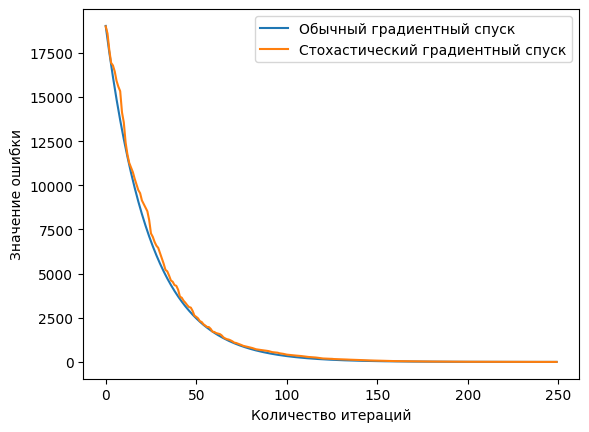

In [21]:
plt.figure()
plt.plot([i for i in range(len(gradErr))], gradErr, label='Обычный градиентный спуск')
plt.plot([i for i in range(len(gradStErr))], gradStErr, label='Стохастический градиентный спуск')
plt.legend()
plt.xlabel('Количество итераций')
plt.ylabel('Значение ошибки')
plt.show()

Изучив полученный граыфик можно сделвть вывод, что и при градиентном спуске и при стохастическом градиентном спуске скорость сходимости будет примерно одинаковой.